# Customer Segmentation Analysis

- **By Aimal Dastagirzada**
- **LinkedIn:** [Aimal Dastagirzada](https://www.linkedin.com/in/aimaldastagirzada/)
- **Portfolio:** [aimaldastagirzada.netlify.app](https://aimaldastagirzada.netlify.app/)





**Project Overview** 

This project is designed to perform customer segmentation using the dataset provided by Dr. Omar Romero-Hernandez. The dataset contains various customer attributes including demographic information (e.g., Year_Birth, Education, Marital_Status), purchasing behavior (e.g., MntWines, MntFruits, MntMeatProducts, etc.), and engagement metrics (e.g., Recency, NumWebPurchases). The objective is to identify distinct customer segments to inform targeted marketing strategies and enhance customer experience.

## 📌 Table of Contents

<details>
  <summary>Click to expand</summary>

- [Project Overview](#project-overview)
- [Dataset Columns Description](#dataset-columns-description)
- [Preprocessing: Data Cleaning & Feature Engineering](#preprocessing-data-cleaning--feature-engineering)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis )
- [K-Means Model Development](#k-means-model-development)

## Dataset Columns Description:

- **ID:** Customer's unique identifier  
- **Year_Birth:** Customer's birth year  
- **Education:** Customer's education level  
- **Marital_Status:** Customer's marital status  
- **Income:** Customer's yearly household income  
- **Kidhome:** Number of children in customer's household  
- **Teenhome:** Number of teenagers in customer's household  
- **Dt_Customer:** Date of customer's enrollment with the company  
- **Recency:** Number of days since customer's last purchase  
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise  
- **MntWines:** Amount spent on wine in last 2 years  
- **MntFruits:** Amount spent on fruits in last 2 years  
- **MntMeatProducts:** Amount spent on meat in last 2 years  
- **MntFishProducts:** Amount spent on fish in last 2 years  
- **MntSweetProducts:** Amount spent on sweets in last 2 years  
- **MntGoldProds:** Amount spent on gold in last 2 years  
- **NumDealsPurchases:** Number of purchases made with a discount  
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise  
- **NumWebPurchases:** Number of purchases made through the company’s website  
- **NumCatalogPurchases:** Number of purchases made using a catalogue  
- **NumStorePurchases:** Number of purchases made directly in stores  
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month  

---

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [43]:
df = pd.read_csv("/Users/aimaldastagirzada/Downloads/marketing_campaign.csv", sep='\t')

In [44]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [46]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [47]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


# Initial Insights

- **Size & Structure:** 2240 records and 29 columns.
- **Demographics:** Average birth year is ~1969, ranging from 1893 to 1996.
- **Income:** Mean income is ~$52K, with potential outliers (max = $666,666).
- **Household:** Most households have 0-1 children and teenagers.
- **Recency:** Average last purchase was 49 days ago.
- **Spending:** Diverse spending patterns across product categories.
- **Campaigns:** Very low campaign acceptance rates (~7% per campaign; 15% overall response).
- **Fixed Metrics:** Z_CostContact and Z_Revenue are constant (3 and 11 respectively).
- **Missing Data:** Some missing values in the Income column require attention.

## Preprocessing: Data Cleaning & Feature Engineering

In [48]:
## Dropping the outlier in the Income column before replacing the missing values as the outlier can skew the mean
# Remove rows in place where Income equals 66666
# During our EDA We observed some customers have YOLO (You only Live Once) in their marital status we will be removing these customers 
df.drop(df[df['Income'] == 666666].index, inplace=True)
df.drop(df[df['Marital_Status'] =='YOLO'].index, inplace=True)

In [49]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [50]:
# Create copies for different imputation methods
df_mean = df.copy()
df_median = df.copy()
df_random = df.copy()

# 1. Mean Imputation 
df_mean['Income'] = df_mean['Income'].fillna(df_mean['Income'].mean())

# 2. Median Imputation 
df_median['Income'] = df_median['Income'].fillna(df_median['Income'].median())

# 3. Random Imputation: Replace missing values by randomly sampling from observed Income values.
observed_incomes = df['Income'].dropna()
missing_mask = df['Income'].isnull()
df_random.loc[missing_mask, 'Income'] = np.random.choice(observed_incomes, size=missing_mask.sum(), replace=True)

In [51]:
# Calculate summary statistics for each method
stats_original = df['Income'].describe()
stats_mean = df_mean['Income'].describe()
stats_median = df_median['Income'].describe()
stats_random = df_random['Income'].describe()

# Combine the summaries into a single DataFrame
summary_df = pd.DataFrame({
    'Original': stats_original,
    'Mean Imputation': stats_mean,
    'Median Imputation': stats_median,
    'Random Imputation': stats_random
})

# Display the summary table
print("Income Summary Statistics for Different Imputation Methods:")
display(summary_df)


Income Summary Statistics for Different Imputation Methods:


,Original,Mean Imputation,Median Imputation,Random Imputation
count,2213.000000,2237.000000,2237.000000,2237.000000
mean,51973.058744,51973.058744,51966.803308,51997.577559
std,21535.786524,21419.898042,21419.982304,21545.706147
min,1730.000000,1730.000000,1730.000000,1730.000000
25%,35246.000000,35523.000000,35523.000000,35246.000000
50%,51390.000000,51766.000000,51390.000000,51390.000000
75%,68487.000000,68281.000000,68281.000000,68655.000000
max,162397.000000,162397.000000,162397.000000,162397.000000


Recommendation:
Given that our goal is to preserve the original statistical features while filling in the missing values, random imputation is the best approach for this dataset. 

In [52]:
# Get the observed Income values (non-missing)
observed_incomes = df['Income'].dropna()

# Create a boolean mask for missing Income values
missing_mask = df['Income'].isnull()

# Replace missing Income values by randomly sampling from observed incomes
df.loc[missing_mask, 'Income'] = np.random.choice(observed_incomes, size=missing_mask.sum(), replace=True)

In [53]:
# Create Age column (Current year is 2025)
df['Age'] = 2025 - df['Year_Birth']
df['Age'].describe()

count    2237.000000
mean       56.201609
std        11.990196
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

In [54]:
#Dropping Outliers in Age Column
df.drop(df[df['Age']>100].index, inplace=True)

## Exploratory Data Analysis 

In [55]:
# Set a consistent plot style
sns.set(style='whitegrid', palette='coolwarm', font_scale=1.2)

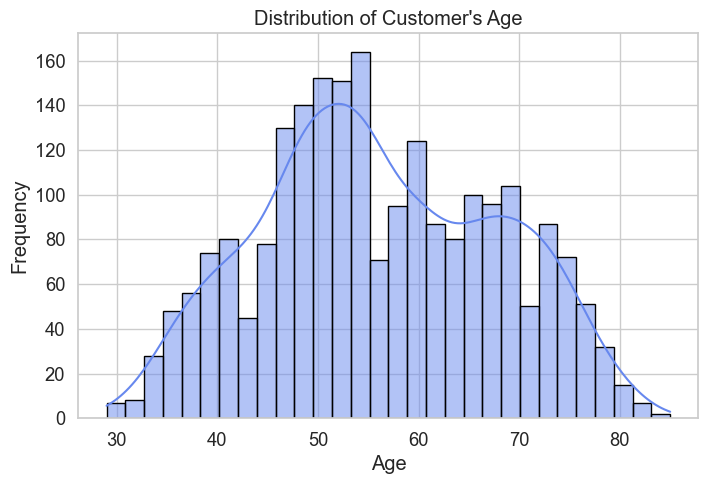

In [56]:
# Step 3: Visualizing Customer Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Customer's Age")
plt.grid(True)
plt.show()

- Age Distribution Insights:
  - Most customers are between 36 to 50 years old.
  - The age distribution follows a normal pattern, with fewer older and younger customers.

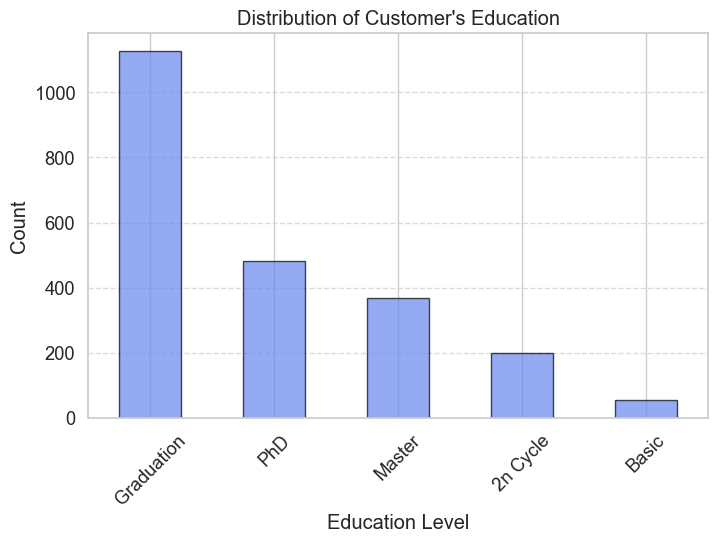

In [57]:
# Step 3.3: Visualizing Customer Education Level
plt.figure(figsize=(8, 5))
df['Education'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title("Distribution of Customer's Education")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Education Level Insights
    - Customers have three major education levels: Undergraduate, Graduate, and Postgraduate.
    - Most of customers seem to have an Undergraduate degree

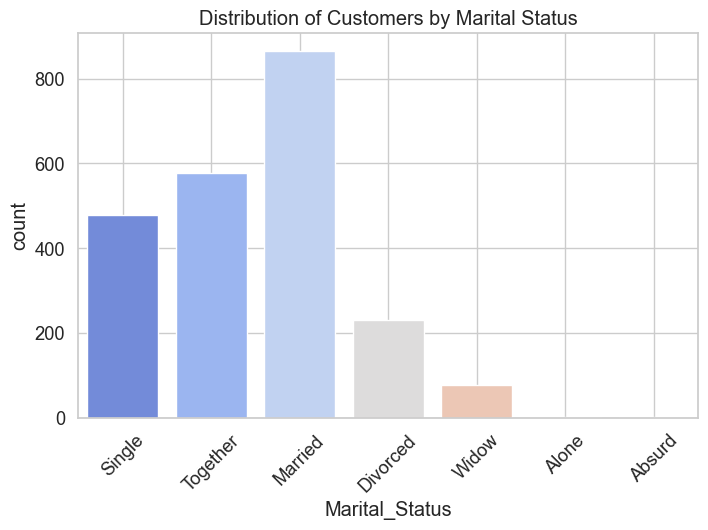

In [58]:
# Bar chart for Marital Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', data=df, palette='coolwarm')
plt.title("Distribution of Customers by Marital Status")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Marital Status Insights
    - Most customers live together (Married or Together).


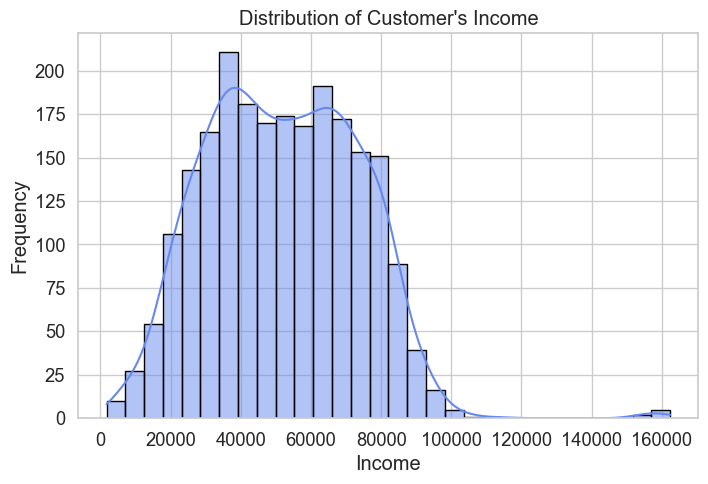

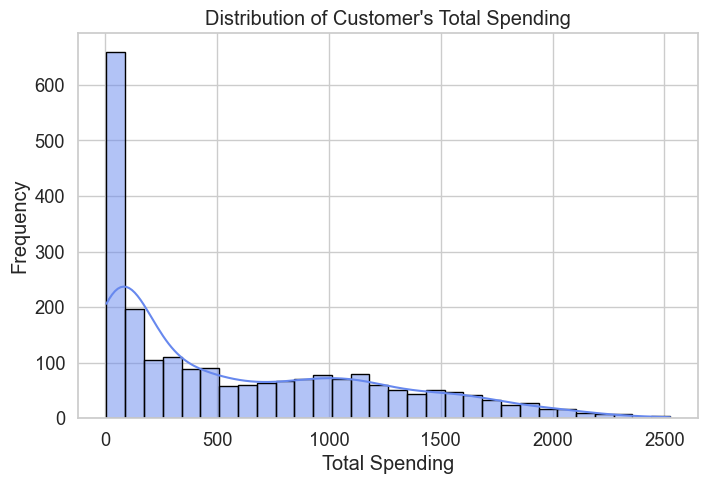

In [59]:
# Plot income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title("Distribution of Customer's Income")
plt.grid(True)
plt.show()

# Plot total spending distribution (sum of all product category spendings)
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Spending'], bins=30, kde=True, edgecolor='black')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title("Distribution of Customer's Total Spending")
plt.grid(True)
plt.show()

- Income and Spending Insights
  - Most customers have an income between 20,000 to 80,000.
  - Spending is significantly lower than income, indicating that only a small portion of income is spent on purchases.

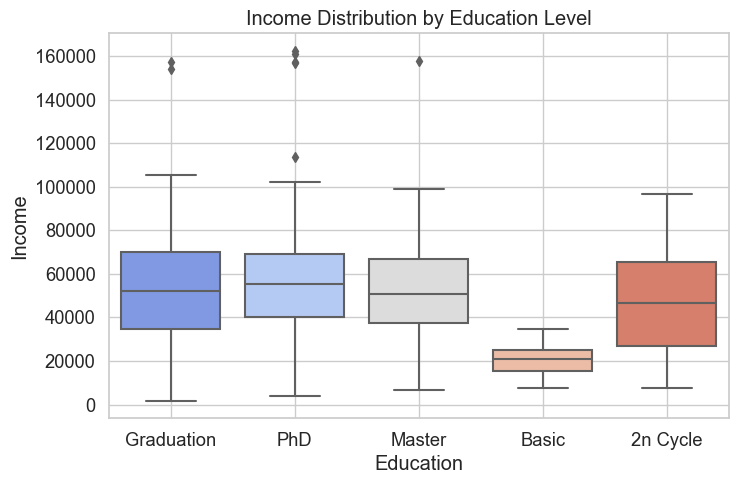

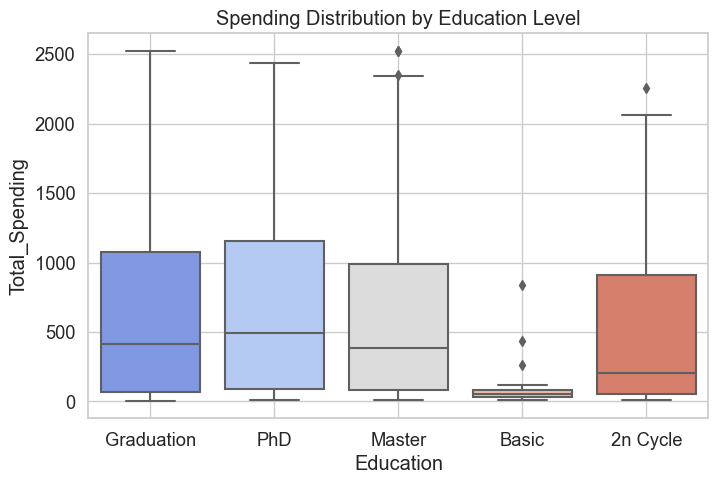

In [60]:
# Boxplot for Income by Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='Income', data=df, palette='coolwarm')
plt.title("Income Distribution by Education Level")
plt.grid(True)
plt.show()

# Boxplot for Spending by Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y=df['Total_Spending'], data=df, palette='coolwarm')
plt.title("Spending Distribution by Education Level")
plt.grid(True)
plt.show()


Income Distribution by Education Level:
   - Higher education levels (PhD, Master’s, Graduation) lead to higher median income.
   - Basic education has the lowest income, while 2nd Cycle falls in between.
   - Income variability increases with education, with higher degrees showing more outliers.

Spending Distribution by Education Level:
   - Higher education levels correlate with increased spending, but not at the same rate as income.
   - Basic education has the lowest spending, reflecting financial limitations.
   - PhD, Master’s, and Graduation holders have higher spending potential, but savings may vary.

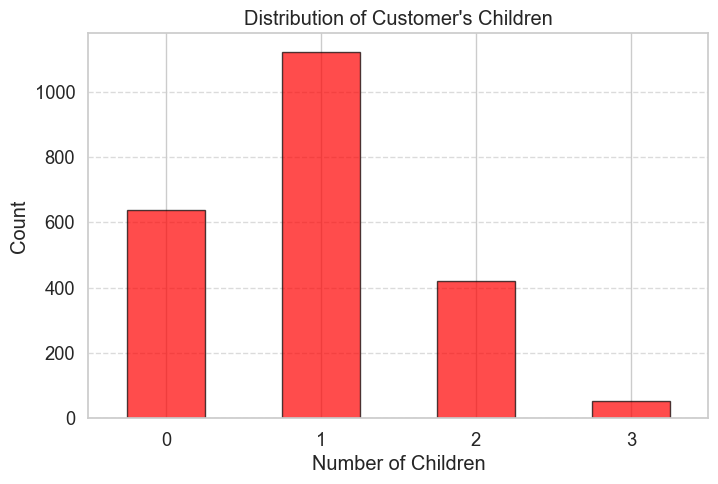

In [61]:
#Visualizing Number of Children
plt.figure(figsize=(8, 5))
child_counts = df['Kidhome'] + df['Teenhome']
child_counts.value_counts().sort_index().plot(kind='bar', color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.title("Distribution of Customer's Children")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



- Household Children Insights
     - ~ 630 customers have no children.
     - Most customers have one child.
     - ~ 410 customers have two children, and ~ 50 customers have three children.

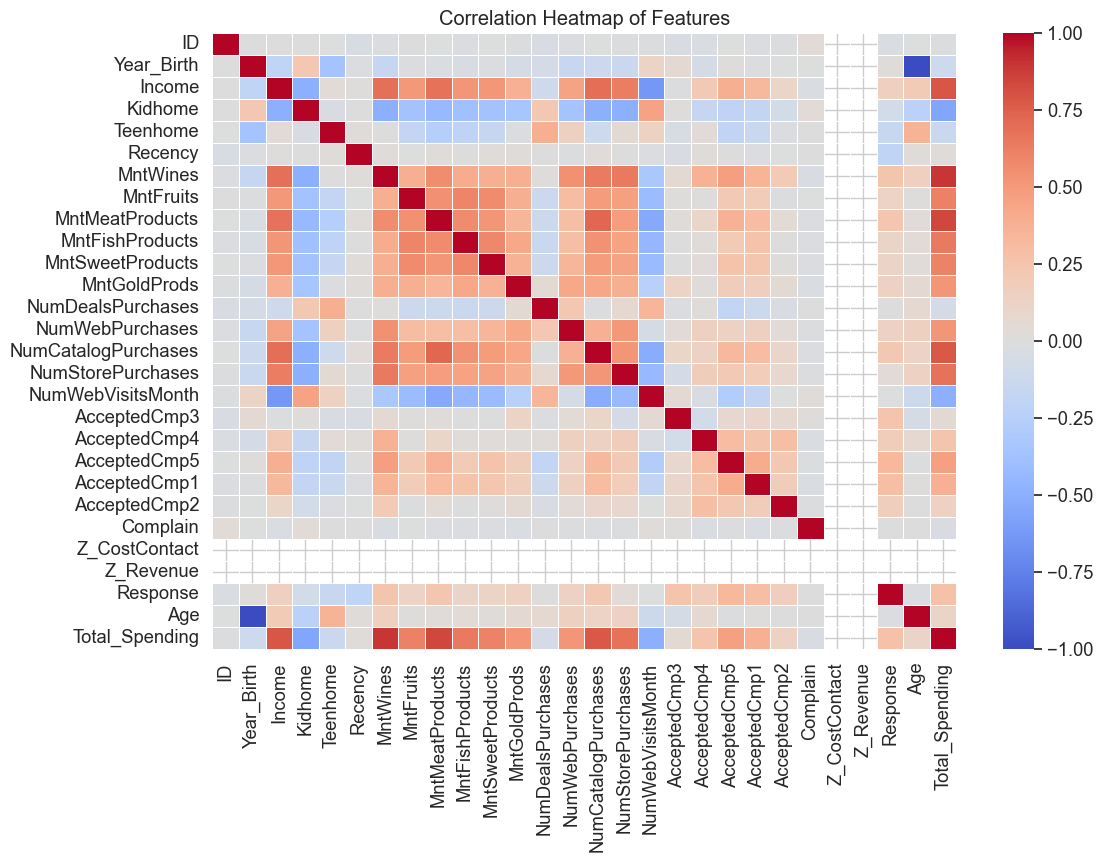

In [62]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()



- Correlation Heatmap Insights
    - Strong correlations exist between different spending categories (e.g., customers who spend on wines also spend on meat and fish).
    - Income and spending show a positive correlation, but not very strong.
    - Recency has weak correlation with spending, suggesting that recent buyers don't necessarily spend more.

## K-Means Model Development

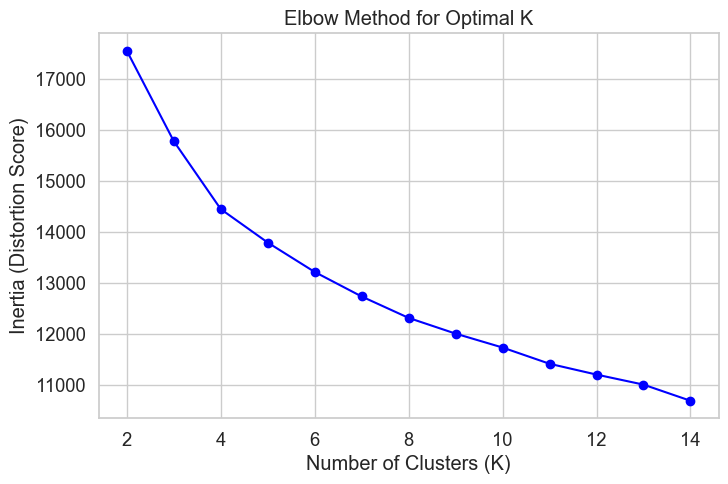

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Encode categorical variables
label_enc = LabelEncoder() 

# Encode categorical variables
label_enc = LabelEncoder()
df['Education'] = label_enc.fit_transform(df['Education'])
df['Marital_Status'] = label_enc.fit_transform(df['Marital_Status'])

# Define selected features for clustering
selected_features = [
    'Income', 'Age', 'Total_Spending', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
    'Kidhome', 'Teenhome', 'Education', 'Marital_Status'
]

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])

#Determine optimal clusters using the Elbow method
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method results
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Distortion Score)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [64]:
# Apply K-Means Clustering with optimal K Value
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=101, n_init=100)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster')[selected_features].mean()

# Display cluster analysis
display(cluster_summary)

,Income,Age,Total_Spending,Recency,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,Kidhome,Teenhome,Education,Marital_Status
Cluster,,,,,,,,,,,
0,30085.884228,46.825503,115.991611,48.889262,2.380872,3.229866,0.557047,0.857383,0.018456,2.045302,3.691275
1,41922.845124,61.455067,126.892925,49.715105,2.315488,3.569790,0.743786,0.722753,0.986616,2.552581,3.762906
2,60773.954237,60.901695,809.455932,47.801695,6.611864,8.159322,3.322034,0.128814,0.971186,2.567797,3.694915
3,76891.900952,55.921905,1411.548571,50.430476,4.942857,8.268571,6.232381,0.053333,0.059048,2.436190,3.765714


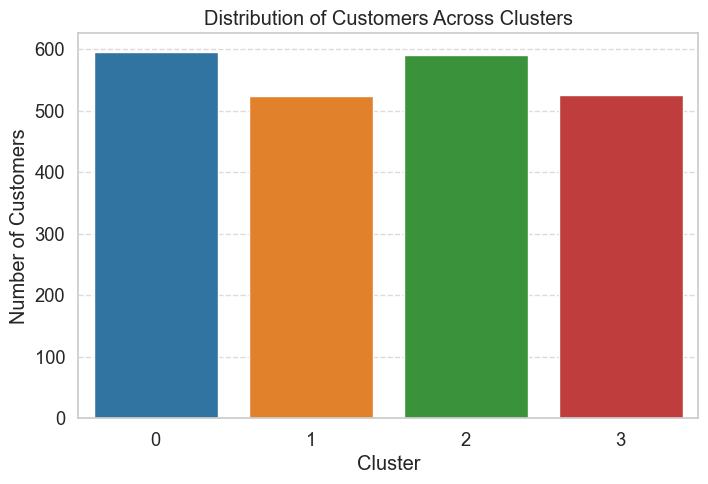

In [70]:
# Bar Plot for Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Clusters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

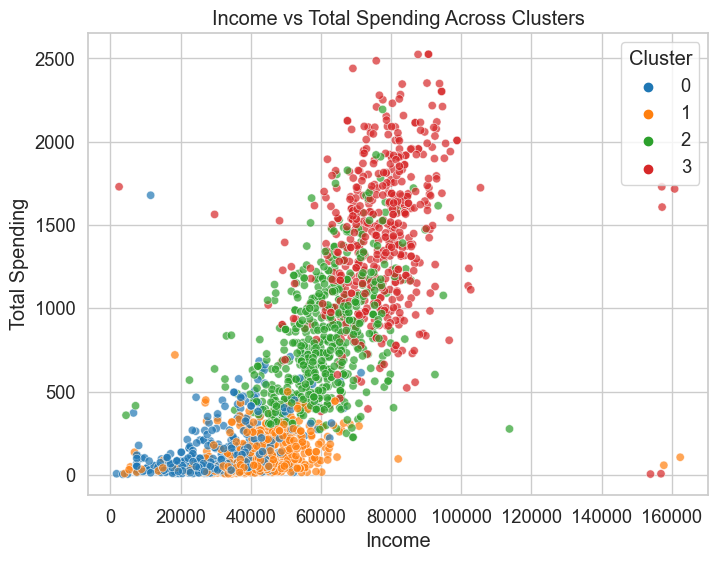

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Total_Spending'], hue=df['Cluster'], palette='tab10', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Income vs Total Spending Across Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Insights: Income vs Total Spending Across Clusters
From the scatter plot, we can observe key customer spending behaviors based on income levels:

Cluster 0 (Blue - Average Income, Low Spending)
 - Customers in this cluster earn less than 60,000 and spend very little (mostly below 700).
 - This segment represents budget-conscious shoppers or customers with lower purchasing power.
 - They may respond better to discounts, promotions, and budget-friendly product bundles.

Cluster 1 (Orange - Middle-High Income, Moderate Spending)
 - These customers have higher income levels (above 80,000) and spend significantly more (up to 2,200).
 - Represents premium shoppers who are more likely to purchase luxury or high-end products.
 - Businesses can target this group with exclusive memberships, loyalty programs, and premium offers.

Cluster 2 (Green - High Income, High Spending)
 - Customers with mid-range incomes (50,000 - 100,000) and moderate spending (up to 2,500).
 - Likely value-conscious buyers who spend on a mix of necessities and lifestyle products.
 - Marketing strategies should focus on balanced deals, personalized recommendations, and occasional high-value offers.

Cluster 3 (Red - Very Low Income, Minimal Spending)
 - Customers earning less than 40,000 with very low spending (<500).
 - Could be price-sensitive shoppers or new customers with minimal engagement.
 - Businesses should increase brand awareness, offer strong incentives, and use targeted promotions to improve spending behavior.


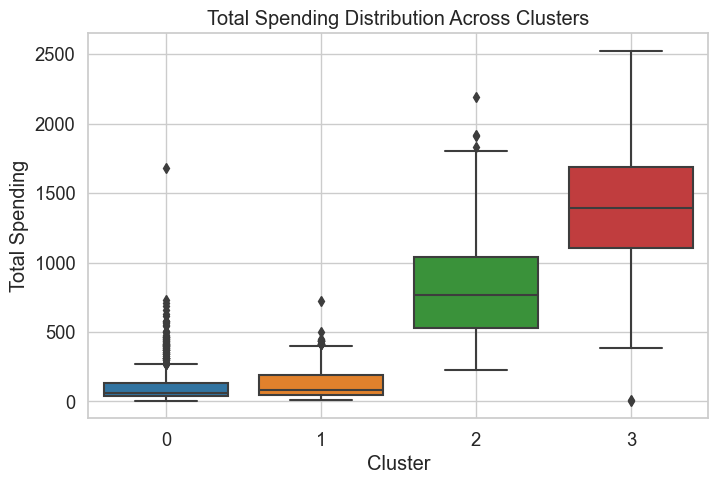

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Total_Spending'], palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.title('Total Spending Distribution Across Clusters')
plt.grid(True)
plt.show()

Insights
- Cluster 0 (Low Spenders): Median spending is very low (~<250) with limited variation.
- Cluster 1 (Moderate Spenders): Median spending is around 750-1,000, with some high-value outliers.
- Cluster 2 (High Spenders): Highest median spending (~1,500) with the broadest range and spending above 2,500.
- Cluster 3 (Minimal Spenders): Spending is minimal (<500), with occasional high-value outliers.


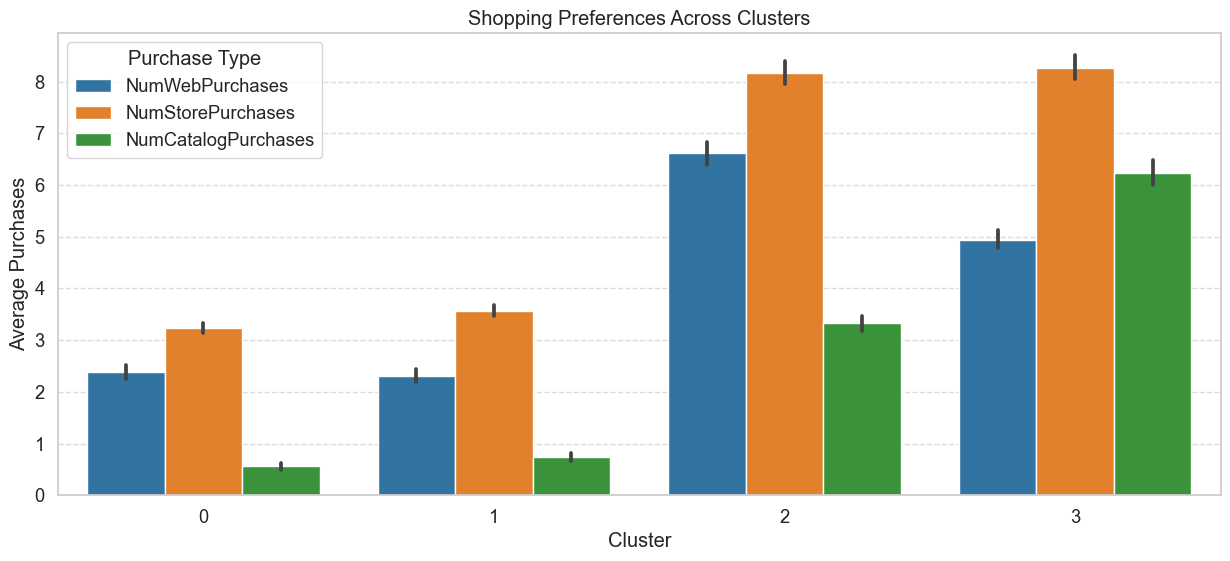

In [68]:
# Create a grouped bar plot for Web, Store, and Catalog purchases across clusters
purchase_features = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
df_melted = df.melt(id_vars=['Cluster'], value_vars=purchase_features, var_name='Purchase_Type', value_name='Count')

plt.figure(figsize=(15, 6))
sns.barplot(x='Cluster', y='Count', hue='Purchase_Type', data=df_melted, palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Average Purchases')
plt.title('Shopping Preferences Across Clusters')
plt.legend(title='Purchase Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights: Shopping Preferences Across Clusters

- Cluster 0 (Budget-Conscious Shoppers)
    - Lowest online purchases (~2 per customer).
    - Slightly higher in-store purchases (~3 per customer).
    - Minimal catalog purchases (~0.5 per customer).
    - These shoppers prefer physical stores but spend conservatively.

- Cluster 1 (High-Spending Digital Shoppers)

    - Most active in all purchase types.
    - Highest store purchases (~8 per customer).
    - High online purchases (~5 per customer).
    - Catalog purchases are also significant (~6 per customer).

- Cluster 2 (Balanced Shoppers)
    - Moderate number of purchases across all categories.
    - Web and store purchases are fairly balanced (~2-3 each).
    - Minimal catalog purchases (~0.5 per customer).

- Cluster 3 (Traditional & Discount Shoppers)

    - Highest store purchases (~8 per customer).
    - Moderate online shopping (~6 per customer).
    - Fair amount of catalog purchases (~3 per customer).
    - Prefers traditional shopping channels but also engages in online purchases.


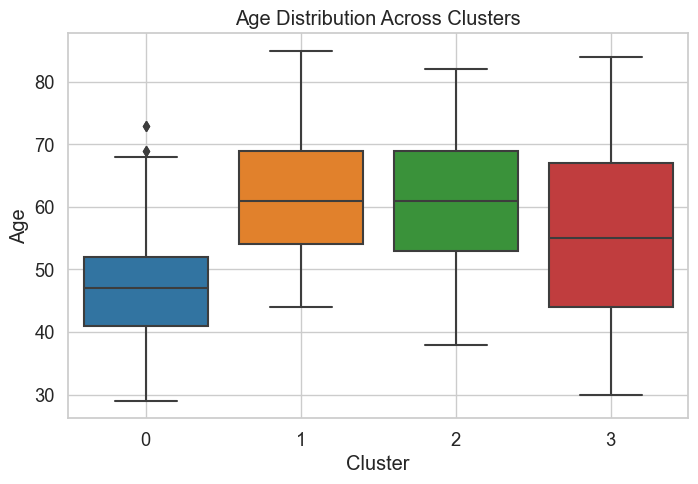

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Age'], palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution Across Clusters')
plt.grid(True)
plt.show()

Cluster 0 (Older, Experienced Shoppers): 

- Median ~60, age range ~45-80. 
- Focus on loyalty programs, trusted brands.

Cluster 1 (Older High-Spenders): 
- Median ~60, age range ~40-80. 
- Premium services, exclusive memberships.

Cluster 2 (Diverse Mid-Age Shoppers): 
- Median ~55, age range ~30-80. 
- Flexible pricing, omnichannel promotions.

Cluster 3 (Younger & Conservative Spenders): 

- Median ~46, age range ~30-70. 
- Digital-first strategy, installment plans.
